# 2. Basic Plotting using Matplotlib

In this exercise, we will be plotting experimental data in Python using 'matplotlib'. (Explain what the purpose is of this exercise, why you will want this as an alternative to excel plots, and what some of the advantages are of using this method.)

# Exercise Outline
* Single line plot with annotation
* Multiple lines in one plot, using different styles and adding a legend
* Plot mean with sd as error bars
* Plot bar chart with mean and sd
* Save/export plot

# Setup and preparing the data

First we need to import some libraries to setup the script

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next, we import the data from file to a numpy array using `np.loadtxt`.

In [3]:
results = np.loadtxt('datafiles/Labresults.csv',delimiter=',')

We can also separate the data in 3 seperate numpy arrays (one for each column):

In [4]:
(conc,counts,run) = np.loadtxt('datafiles/Labresults.csv',delimiter=',',unpack=True)

Have a look at the data, what is in there?

*The data contains cell counts for a range of concentrations for 3 replicates (runs)*

Next, we need to split the data such that we have one list for each replicate. Have a look at the columns we have just loaded, identify the indices for each run and separate the columns (name them `counts_r1`, `counts_r2` and `counts_r3`). Remember that `a[i:j]` gives you items `i` to `j` (excluding `j`) from `a`.

In [5]:
counts_r1 = counts[:6]
counts_r2 = counts[6:12]
counts_r3 = counts[12:]

Now we have the counts per replicate, but `conc` still contains the concentrations for all values. Create a list of unique concentrations, named `cond_unique`, that matches `counts_r1` (or `counts_r2` or `counts_r3`). You can do this in the same way you created the lists for y-axis, or use `np.unique`.

In [6]:
conc_unique = np.unique(conc)

# Basic line plotting

First, we start by creating a plot for the first run.

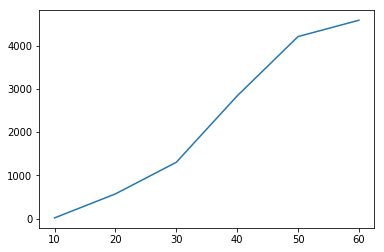

In [17]:
fig = plt.figure()
ax = plt.gca()
ax.plot(conc_unique,counts_r1)

This plot is not very informative; we do not know that is on the axes or what is plotted. This can be changed with the `ax.set` function, for example, to add a title we do the following:


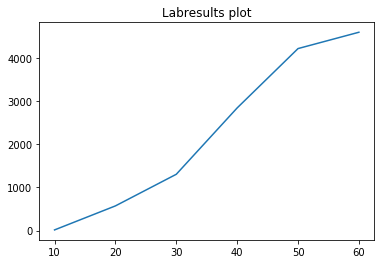

In [21]:
fig = plt.figure()
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.set(title='Labresults plot');

Use the arguments `xlabel` and `ylabel` to add labels to the x- and y-axis:

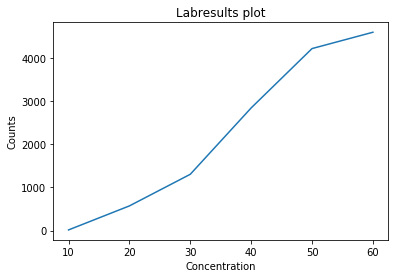

In [22]:
fig = plt.figure()
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts');

Note that the x-axis does not start at zero. The ranges of the axis are controlled with the arguments `xlim` and `ylim` which is set to a list of two values: `[min,max]`. Use the argument `xlim` for `ax.set` such that the x-axis starts at 0.

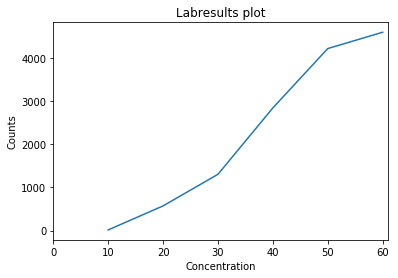

In [24]:
fig = plt.figure()
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts',xlim=[0,61]);

To adapt the markers on the axis, we need to modify the ticks. The position the ticks are controlled by `xticks` and `yticks`, the corresponding labels are controlled by `xticklabels` and `yticklabels`. If no tick labels are provides, these are identical to the tick values. Below we show an example of setting the ticks and tick labels for the y-axis:

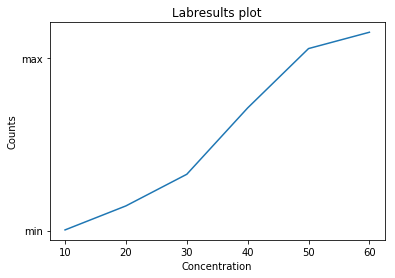

In [23]:
fig = plt.figure()
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.set(title='Labresults plot',yticks=[0,4000],yticklabels=['min','max']);

Replace the current ticks on the x-axis with two ticks: one at 10, with the label *minimum concentration* and one at 60 with the label *maximum concentation*.

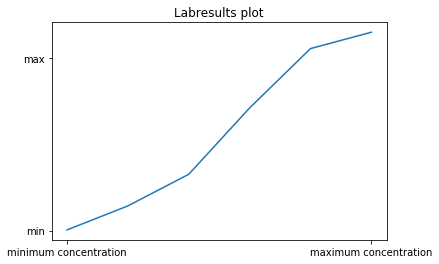

In [25]:
fig = plt.figure()
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.set(title='Labresults plot',yticks=[0,4000],yticklabels=['min','max'],
       xticks=[10,60],xticklabels=['minimum concentration','maximum concentration']);

# Multiple lines in one plot

Next, we want to plot the data for the three runs. Every time you run `plot` on the same axis object, a line is added to that axis:

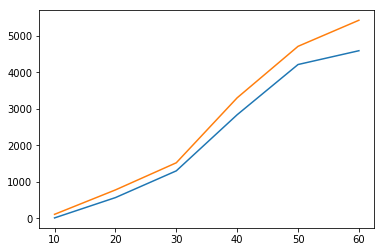

In [27]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.plot(conc_unique,counts_r2)

Add the third line

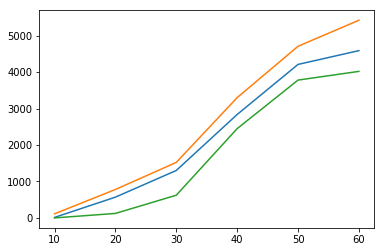

In [29]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.plot(conc_unique,counts_r2)
ax.plot(conc_unique,counts_r3)

Matplotlib automatically gives a different color to each line. However, you may want to choose that yourself. For this, you can use the `color` argument which can be set to any of the following colors: 

<img src="https://matplotlib.org/_images/named_colors.png">

Use `color` to give the lines the following colors: blue, green, orange.

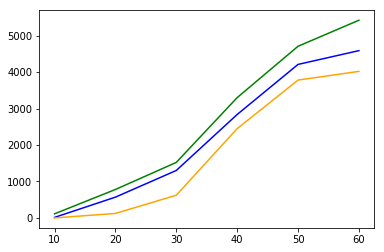

In [30]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1, color='blue')
ax.plot(conc_unique,counts_r2, color='green')
ax.plot(conc_unique,counts_r3, color='orange')

Another way to distinguish lines is by using different line styles using the `linestyle` argument, which can be:

<img src="https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png">

Adapt the plot such that:
* the blue line is dotted
* the green line is dash-dot
* the orange line is dashed

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1, color='blue', linestyle=':')
ax.plot(conc_unique,counts_r2, color='green', linestyle='-.')
ax.plot(conc_unique,counts_r3, color='orange', linestyle='--')

Next, we add markers to the lines to make clear what the actual data is. Use the `marker` to add different markers to each line (possible markers can be found [here](https://matplotlib.org/api/markers_api.html)):

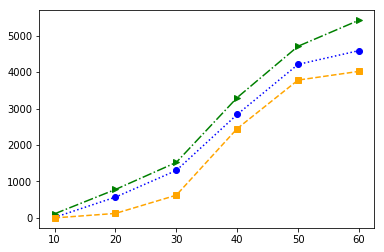

In [8]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1, color='blue', linestyle=':',marker='o')
ax.plot(conc_unique,counts_r2, color='green', linestyle='-.',marker='>')
ax.plot(conc_unique,counts_r3, color='orange', linestyle='--',marker='s')

Now we have 3 clearly distinguished line, but we do not know which line represents which data; we net a legend. A legend is added with `ax.legend()`:

No handles with labels found to put in legend.


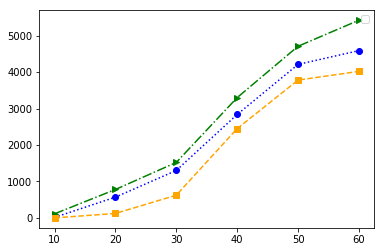

In [31]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1)
ax.plot(conc_unique,counts_r2)
ax.plot(conc_unique,counts_r3)
ax.legend()

However, we need to provide the legend with labels for each line. This can be done with the `label` argument for `ax.plot`, which needs to be set to a string that describes the associated curve. Add a label to each line to create a legend:

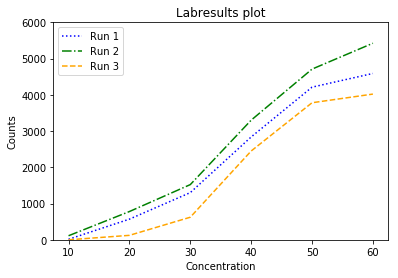

In [33]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts[:6], color='blue', linestyle=':', label='Run 1')
ax.plot(conc_unique,counts[6:12], color='green', linestyle='-.', label='Run 2')
ax.plot(conc_unique,counts[12:], color='orange', linestyle='--', label='Run 3')
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend()

Matplotlib automatically puts the label at the best position. This can be changes with the `loc` argument of `ax.legend()`. `loc` is a value between 0 and 10, where 0 results in the *best* position. Play with around with `loc` and place the legend in the bottom right corner.

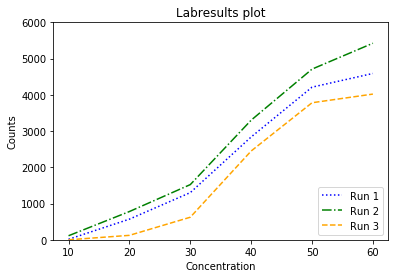

In [36]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts[:6], color='blue', linestyle=':', label='Run 1')
ax.plot(conc_unique,counts[6:12], color='green', linestyle='-.', label='Run 2')
ax.plot(conc_unique,counts[12:], color='orange', linestyle='--', label='Run 3')
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend(loc=4)

# Mean/SD plotting

To follow this up, we want to get the mean of the three runs for each concentration, calculate the sd and then plot the error bars, all with only 1 line displayed in the port. Note that you have to calculate the mean over an interval of 6. However there is a trick to calculate this with np.

[  42.          491.         1149.33333333 2863.         4234.66666667
 4678.33333333]
[ 49.82636518 273.97445136 382.95372508 347.8687492  379.19329577
 576.16799248]


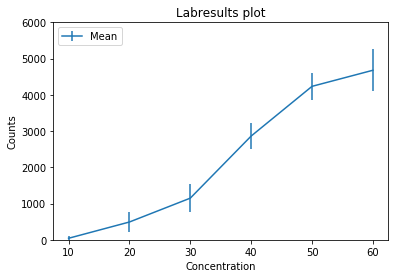

In [13]:
counts_mean = np.mean(counts.reshape(-1,6), axis=0) #keep this line in
counts_std = np.std(counts.reshape(-1,6), axis=0) #keep this line in
print(counts_mean)
print(counts_std)

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.errorbar(conc_unique,counts_mean, yerr=counts_std, label='Mean') #keep this line in
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend(loc=2)

# Bar Charts

We can plot this in a bar chart as well, using the same x and y. Plot the concentration as x and the mean as y, as well as error bars. Make the width of the bars 0,6. 

Text(0.5, 0, 'Concentration')

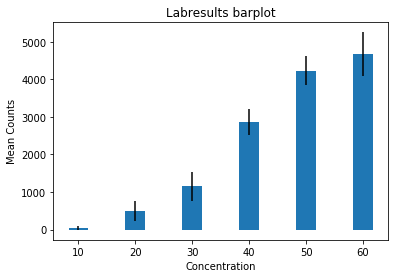

In [14]:
plt.bar(conc_unique,counts_mean, 3.5, yerr=counts_std)
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')

Instead of calculating the mean between the concentrations, we can also calculate them between the runs. Again we calculate the mean, but this time we are going to plot them into a bar chart. Leave the standard deviants out, as these will just be the complete error bar

[2254.33333333 2641.66666667 1833.16666667]


Text(0.5, 0, 'Concentration')

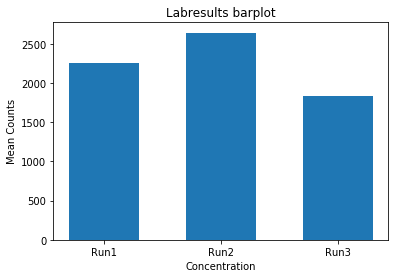

In [15]:
counts_mean2 = np.mean(counts.reshape(-1,6), axis=1)
print(counts_mean2)

plt.bar(['Run1','Run2','Run3'],counts_mean2, 0.6)
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')

For our last bar plot, we want multiple bars per concentration, displaying the concentration. Essentially this is the same as the line plot that was created, but now in bar form. To do this, for each bar. First define a width of 3. To create the 3 bars next to eachother, we substract or add the width to the first and third bar. What this does is placing the bars (for the first concentration) at 7, 10 and 13, but this will display fine in the plot itself. Don't forgot to label each bar with 'Run X'.

**TODO** add errorbars

Text(0.5, 0, 'Concentration')

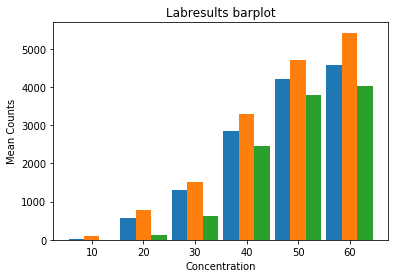

In [16]:
w = 3
plt.bar(conc_unique-w,counts[:6], w, label='Run 1', yerr=counts_std)
plt.bar(conc_unique,counts[6:12], w, label='Run 2', yerr=counts_std)
plt.bar(conc_unique+w,counts[12:], w, label='Run 3', yerr=counts_std)
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')

# Exporting figures

To finalize our plots and use them in future documents, we can save them using savefig. Do this for our previous bar plot and save it as a '.png' and a '.svg'.
If you want to save any of the other plots, put this line of code at the end of the codeblocks and give them an appropiate name

In [1]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000], yticks=(np.arange(0, 6500, step=500)))
ax.plot(conc_unique,counts_r1)
plt.savefig('barplot1.png')
plt.savefig('barplot2.svg')

NameError: name 'plt' is not defined